In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = {
    "Date": pd.date_range(start="2024-01-01", periods=15, freq='D'),
    "Customer_ID": [101,102,103,101,104,102,105,101,103,104,102,105,101,103,104],
    "Total_Amount": [1200, 850, 900, 1500, 700, 950, 1100, 1300, 980, 760, 890, 1250, 1400, 920, 800],
    "Discount_Applied": [100, 50, 0, 150, 0, 80, 100, 120, 0, 50, 70, 110, 140, 0, 60]
}

df = pd.DataFrame(data)
df


,Date,Customer_ID,Total_Amount,Discount_Applied
0,2024-01-01,101,1200,100
1,2024-01-02,102,850,50
2,2024-01-03,103,900,0
3,2024-01-04,101,1500,150
4,2024-01-05,104,700,0
5,2024-01-06,102,950,80
6,2024-01-07,105,1100,100
7,2024-01-08,101,1300,120
8,2024-01-09,103,980,0
9,2024-01-10,104,760,50


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15 non-null     datetime64[ns]
 1   Customer_ID       15 non-null     int64         
 2   Total_Amount      15 non-null     int64         
 3   Discount_Applied  15 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 552.0 bytes


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Discount_Used'] = df['Discount_Applied'] > 0
df


,Date,Customer_ID,Total_Amount,Discount_Applied,Discount_Used
0,2024-01-01,101,1200,100,True
1,2024-01-02,102,850,50,True
2,2024-01-03,103,900,0,False
3,2024-01-04,101,1500,150,True
4,2024-01-05,104,700,0,False
5,2024-01-06,102,950,80,True
6,2024-01-07,105,1100,100,True
7,2024-01-08,101,1300,120,True
8,2024-01-09,103,980,0,False
9,2024-01-10,104,760,50,True


In [7]:
daily_discount_usage = df.groupby('Date')['Discount_Used'].sum()
daily_discount_usage


Date
2024-01-01    1
2024-01-02    1
2024-01-03    0
2024-01-04    1
2024-01-05    0
2024-01-06    1
2024-01-07    1
2024-01-08    1
2024-01-09    0
2024-01-10    1
2024-01-11    1
2024-01-12    1
2024-01-13    1
2024-01-14    0
2024-01-15    1
Name: Discount_Used, dtype: int64

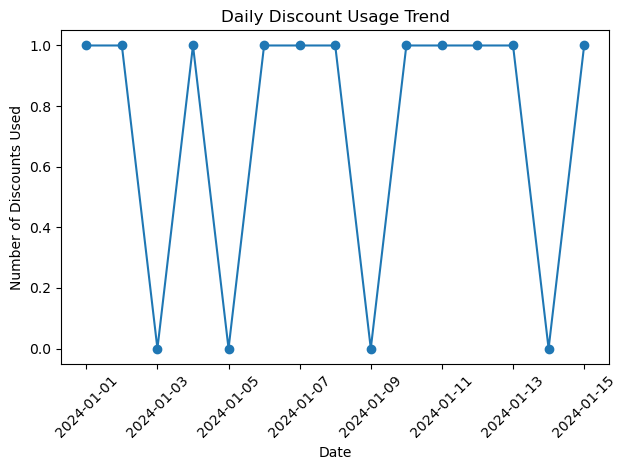

In [8]:
plt.figure()
plt.plot(daily_discount_usage.index, daily_discount_usage.values, marker='o')
plt.title("Daily Discount Usage Trend")
plt.xlabel("Date")
plt.ylabel("Number of Discounts Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
daily_discount_amount = df.groupby('Date')['Discount_Applied'].sum()
daily_discount_amount


Date
2024-01-01    100
2024-01-02     50
2024-01-03      0
2024-01-04    150
2024-01-05      0
2024-01-06     80
2024-01-07    100
2024-01-08    120
2024-01-09      0
2024-01-10     50
2024-01-11     70
2024-01-12    110
2024-01-13    140
2024-01-14      0
2024-01-15     60
Name: Discount_Applied, dtype: int64

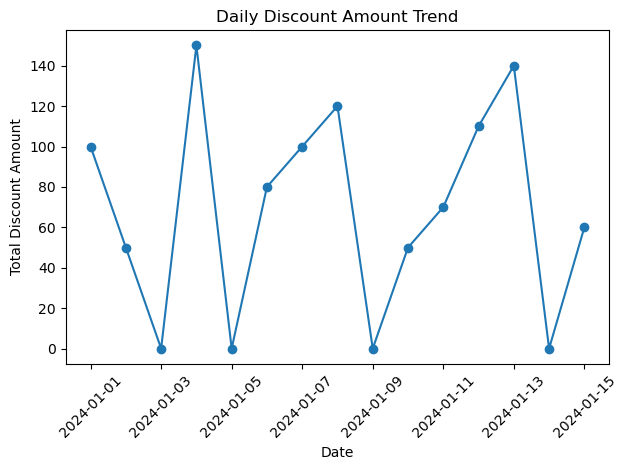

In [10]:
plt.figure()
plt.plot(daily_discount_amount.index, daily_discount_amount.values, marker='o')
plt.title("Daily Discount Amount Trend")
plt.xlabel("Date")
plt.ylabel("Total Discount Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
df['Discount_Applied'].describe()


count     15.000000
mean      68.666667
std       51.943192
min        0.000000
25%       25.000000
50%       70.000000
75%      105.000000
max      150.000000
Name: Discount_Applied, dtype: float64

In [12]:
customer_pattern = df.groupby('Customer_ID').agg({
    'Discount_Applied': ['count', 'sum', 'mean'],
    'Discount_Used': 'sum'
})

customer_pattern


Discount_Applied                  Discount_Used
                       count  sum        mean           sum
Customer_ID                                                
101                        4  510  127.500000             4
102                        3  200   66.666667             3
103                        3    0    0.000000             0
104                        3  110   36.666667             2
105                        2  210  105.000000             2

In [13]:
frequent_users = customer_pattern[('Discount_Used', 'sum')] >= 3
customer_pattern[frequent_users]


Discount_Applied                  Discount_Used
                       count  sum        mean           sum
Customer_ID                                                
101                        4  510  127.500000             4
102                        3  200   66.666667             3

In [14]:
df.groupby('Discount_Used')['Total_Amount'].mean()


Discount_Used
False     875.000000
True     1090.909091
Name: Total_Amount, dtype: float64

In [15]:
discount_behavior = df.groupby('Customer_ID')['Discount_Used'].mean()
discount_behavior


Customer_ID
101    1.000000
102    1.000000
103    0.000000
104    0.666667
105    1.000000
Name: Discount_Used, dtype: float64

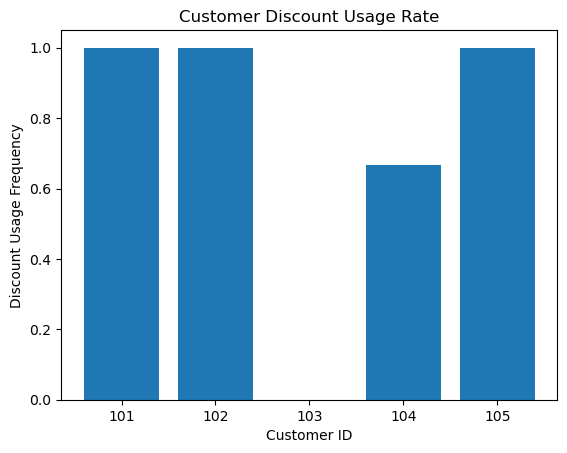

In [16]:
plt.figure()
plt.bar(discount_behavior.index, discount_behavior.values)
plt.title("Customer Discount Usage Rate")
plt.xlabel("Customer ID")
plt.ylabel("Discount Usage Frequency")
plt.show()
